In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

This code was adapted from https://www.statsmodels.org/dev/examples/notebooks/generated/exponential_smoothing.html

In [2]:
#Read in the data
df = pd.read_excel('grocery_dataset.xlsx',index_col='PERIOD')
df.head()

,MONTH,AMOUNT
PERIOD,,
1,2020-10-01,373.84
2,2020-11-01,367.55
3,2020-12-20,283.34
4,2021-01-21,423.97
5,2021-02-21,389.39


In [3]:
#At this point, I am only worried about the periods, not the months 
df.drop(['MONTH'],axis=1,inplace=True)
df.head()

,AMOUNT
PERIOD,
1,373.84
2,367.55
3,283.34
4,423.97
5,389.39


In [4]:
index.shape

NameError: name 'index' is not defined

In [ ]:
df.plot(title='Grocery Costs Overtime',xlabel='Period',ylabel="Cost (In Dollars $)")
plt.show()

## SES

In [ ]:
ses_fit = SimpleExpSmoothing(df, initialization_method="estimated").fit(
    smoothing_level=0.8, optimized=False
)
ses_forecast = ses_fit.forecast(4).rename(r"$\alpha=0.8$")

plt.figure(figsize=(12, 8))
plt.plot(df, marker="o", color="black")
plt.plot(ses_fit.fittedvalues, marker="o", color="red")
(line3,) = plt.plot(ses_forecast, marker="o", color="red")
plt.legend([line3], [ses_forecast.name])

In [ ]:
ses_forecast

HW

C:\Users\Ben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Ben\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Ben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Ben\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Ben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index begi

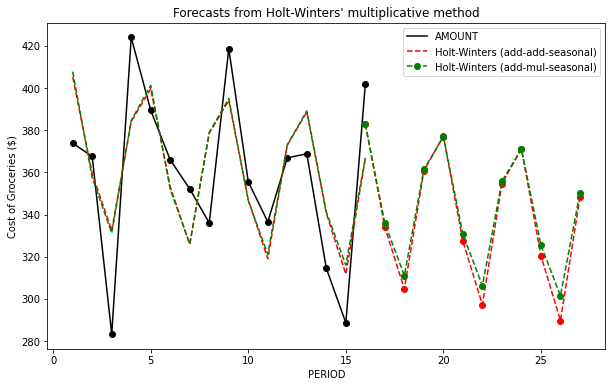

,Additive,Multiplicative
$\alpha$,0.005000,0.005000
$\beta$,0.000100,0.000100
$\phi$,NaN,NaN
$\gamma$,0.000100,0.000100
$l_0$,98173.835565,98173.835565
$b_0$,-789.251488,0.991961
SSE,11708.408533,11967.209437


In [5]:
hw_add = ExponentialSmoothing(
    df,
    seasonal_periods=4,
    trend="add",
    seasonal="add",
    use_boxcox=True,
    initialization_method="estimated",
).fit()
hw_mul = ExponentialSmoothing(
    df,
    seasonal_periods=4,
    trend="mul",
    seasonal="mul",
    use_boxcox=True,
    initialization_method="estimated",
).fit()

results = pd.DataFrame(
    index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"]
)
params = [
    "smoothing_level",
    "smoothing_trend",
    "damping_trend",
    "smoothing_seasonal",
    "initial_level",
    "initial_trend",
]
results["Additive"] = [hw_add.params[p] for p in params] + [hw_add.sse]
results["Multiplicative"] = [hw_mul.params[p] for p in params] + [hw_mul.sse]


ax = df.plot(
    figsize=(10, 6),
    marker="o",
    color="black",
    title="Forecasts from Holt-Winters' multiplicative method",
)
ax.set_ylabel("Cost of Groceries ($)")
ax.set_xlabel("Period")
hw_add.fittedvalues.plot(ax=ax, style="--", color="red")
hw_mul.fittedvalues.plot(ax=ax, style="--", color="green")

hw_add.forecast(12).rename("Holt-Winters (add-add-seasonal)").plot(
    ax=ax, style="--", marker="o", color="red", legend=True
)
hw_mul.forecast(12).rename("Holt-Winters (add-mul-seasonal)").plot(
    ax=ax, style="--", marker="o", color="green", legend=True
)

plt.show()


results

In [8]:
data = pd.DataFrame(
    np.c_[df, hw_add.level, hw_add.trend, hw_add.season, hw_add.fittedvalues],
    columns=[r"$y_t$", r"$l_t$", r"$b_t$", r"$s_t$", r"$\hat{y}_t$"],
    index=df.index,
)
data.append(hw_add.forecast(12).rename(r"$\hat{y}_t$").to_frame(), sort=True)

C:\Users\Ben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


,$\hat{y}_t$,$b_t$,$l_t$,$s_t$,$y_t$
1,405.203887,-789.260291,97296.548322,17688.547299,373.84
2,359.333867,-789.258149,96528.714409,-6674.581666,367.55
3,332.444848,-789.268888,95632.060936,-19216.252352,283.34
4,384.063126,-789.257244,94959.236869,8201.135522,423.97
5,399.669366,-789.260169,94140.732959,17687.962365,389.39
6,353.154254,-789.256877,93384.384438,-6673.923433,365.92
7,325.741821,-789.250492,92658.980275,-19214.975298,352.11
8,378.650902,-789.261407,91760.580413,8198.952535,336.04
9,394.082409,-789.254209,91043.294959,17689.401884,418.60
10,346.975760,-789.252071,90275.428308,-6673.495682,355.48


In [12]:
hw_add.forecast(4)

C:\Users\Ben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


16    382.896442
17    333.958186
18    304.636797
19    360.704435
dtype: float64

In [13]:
hw_mul.forecast(4)

C:\Users\Ben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


16    382.851730
17    335.832415
18    311.056608
19    361.371618
dtype: float64

In [9]:
#Actual
data[r"$y_t$"]

PERIOD
1     373.84
2     367.55
3     283.34
4     423.97
5     389.39
6     365.92
7     352.11
8     336.04
9     418.60
10    355.48
11    336.52
12    366.88
13    368.80
14    314.48
15    288.60
16    401.87
Name: $y_t$, dtype: float64

In [10]:
#Predicted
data[r"$\hat{y}_t$"]

PERIOD
1     405.203887
2     359.333867
3     332.444848
4     384.063126
5     399.669366
6     353.154254
7     325.741821
8     378.650902
9     394.082409
10    346.975760
11    318.974566
12    372.850816
13    388.699767
14    340.539603
15    311.739159
16    366.566821
Name: $\hat{y}_t$, dtype: float64